Q1 > Implement Principal Component Analysis from scratch in Python for the following dataset and show the
following steps below.

In [23]:
from google.colab import files
uploaded=files.upload()

Saving IRIS (1).csv to IRIS (1).csv


The IRIS Dataset is : 

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
After Scaling the Dataset is : 

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]
The covariane matrix is : 

[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]
Eigen Values are : 

[2.91081808 0.92122

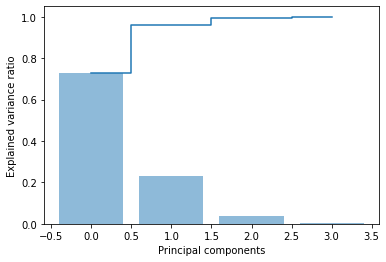

In [25]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
df=pd.read_csv('IRIS (1).csv')
print("The IRIS Dataset is : \n")
print(df.head())
m=df.shape[0]
n=df.shape[1]
x=np.array(df.iloc[:,:n-1])
# scaling the data
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x)
print("After Scaling the Dataset is : \n")
print(x_scaled[:5])
m=x_scaled.shape[0]
n=x_scaled.shape[1]
# finding covariance matrix
mat_1=np.ones([m,m])
temp_mat=np.dot(mat_1,x_scaled)
temp_mat=temp_mat/m
temp_mat=x_scaled-temp_mat
dev_mat=np.dot(temp_mat.T,temp_mat)
cov_mat=dev_mat/m
print("The covariane matrix is : \n")
print(cov_mat)
# Eigen Values and Eigen Vectors for covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print("Eigen Values are : \n")
print(eig_vals)
print("Eigen Vectors are : \n")
print(eig_vecs)
# sorting the eigen values and their corresponding eigen vectors
def func(val,vec,i,j):
  num1=val[i]
  val[i]=val[j]
  val[j]=num1
  num2=vec[i]
  vec[i]=vec[j]
  vec[j]=num2
for i in range(n-1):
  for j in range(i+1,n):
    if(eig_vals[j]>eig_vals[i]):
      func(eig_vals,eig_vecs,i,j)
print("After Sorting the eigen values and their corresponding eigen vectors are : \n")
for i in range(n):
  print(eig_vals[i]," --> ",eig_vecs[i],"\n")

# we now calculated the explained variance
ev=[]
total=np.sum(eig_vals)
for i in range(len(eig_vals)):
  ev.append(eig_vals[i]/total)
cv=np.cumsum(ev)
print("The individual explained variance array is : \n")
print(ev)
print("The cumulative explained variance array is : \n")
print(cv)
# we now plot the obtained data
plt.bar(range(4), ev, alpha=0.5, align='center',
            label='individual explained variance')
plt.step(range(4), cv, where='mid',
             label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

# we now create the array for eigen vectors by selecting only 2 dimensions
pr_mat=[]
for i in range(len(eig_vals)):
  temp=[]
  temp.append(eig_vecs[i][0])
  temp.append(eig_vecs[i][1])
  pr_mat.append(temp)
print("The projection matrix is : \n")
pr_mat=np.array(pr_mat)
print(pr_mat)
res=np.dot(x_scaled,pr_mat)
print("The shape of final matrix having only 2 dimensions is : \n")
print(res.shape)
print("The final transformed matrix is : \n")
print(res[:5])

Q2 > Implement PCA and Logistic Regression for the following dataset by performing the required steps.
Dataset: https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression

In [1]:
from google.colab import files
uploaded=files.upload()

Saving framingham.csv to framingham.csv


The Framingham Dataset is : 

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0   

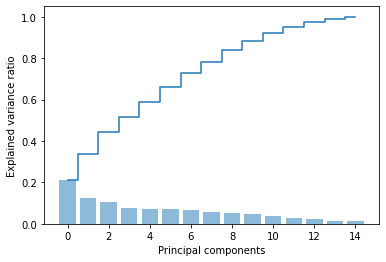

In [19]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
# Load the dataset
df=pd.read_csv('framingham.csv')
print("The Framingham Dataset is : \n")
print(df.head())
m=df.shape[0]
n=df.shape[1]
print(n)
x=np.array(df.iloc[:,:n-1])
def findmean(arr):
  arr=arr.tolist()
  sum=0.0
  cnt=0.0
  for i in range(len(arr)):
    if(np.isnan(arr[i])==False):
      sum+=arr[i]
      cnt+=1
  return (sum/cnt)
def fillvalues(x):
  rows=x.shape[0];
  cols=x.shape[1];
  for i in range(rows):
    for j in range(cols):
      if(np.isnan(x[i][j])):
        x[i][j]=means[j]
means=[]
for i in range(n-1):
  means.append(findmean(np.array(df.iloc[:,i])));     
fillvalues(x)
print(x[:5])
# scaling the data
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x)
print("After Scaling the Dataset is : \n")
print(x_scaled[:5])
m=x_scaled.shape[0]
n=x_scaled.shape[1]
# now we select the principal components based on PCA Analysis


# finding covariance matrix
mat_1=np.ones([m,m])
temp_mat=np.dot(mat_1,x_scaled)
temp_mat=temp_mat/m
temp_mat=x_scaled-temp_mat
dev_mat=np.dot(temp_mat.T,temp_mat)
cov_mat=dev_mat/m
print("The covariane matrix is : \n")
print(cov_mat)
# Eigen Values and Eigen Vectors for covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print("Eigen Values are : \n")
print(eig_vals)
print("Eigen Vectors are : \n")
print(eig_vecs)
# sorting the eigen values and their corresponding eigen vectors
def func(val,vec,i,j):
  num1=val[i]
  val[i]=val[j]
  val[j]=num1
  num2=vec[i]
  vec[i]=vec[j]
  vec[j]=num2
for i in range(n-1):
  for j in range(i+1,n):
    if(eig_vals[j]>eig_vals[i]):
      func(eig_vals,eig_vecs,i,j)
print("After Sorting the eigen values and their corresponding eigen vectors are : \n")
for i in range(n):
  print(eig_vals[i]," --> ",eig_vecs[i],"\n")

# we now calculated the explained variance
ev=[]
total=np.sum(eig_vals)
for i in range(len(eig_vals)):
  ev.append(eig_vals[i]/total)
cv=np.cumsum(ev)
print("The individual explained variance array is : \n")
print(ev)
print("The cumulative explained variance array is : \n")
print(cv)
# we now plot the obtained data
plt.bar(range(15), ev, alpha=0.5, align='center',
            label='individual explained variance')
plt.step(range(15), cv, where='mid',
             label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

# we now create the array for eigen vectors by selecting only 2 dimensions
pr_mat=[]
for i in range(len(eig_vals)):
  temp=[]
  temp.append(eig_vecs[i][0])
  temp.append(eig_vecs[i][1])
  pr_mat.append(temp)
print("The projection matrix is : \n")
pr_mat=np.array(pr_mat)
print(pr_mat)
res=np.dot(x_scaled,pr_mat)
print("The shape of final matrix having only 2 dimensions is : \n")
print(res.shape)
print("The final transformed matrix is : \n")
print(res[:5])

## now we divide into training and testing set
## based on 90 % data in training set and 
## 10% data in testing set


x_train=res[:int(0.9*m)]
y_train=df.iloc[:int(0.9*m),-1]
x_test=res[int(0.9*m):]
y_test=df.iloc[int(0.9*m):,-1]
## now we define our gradient descent function
## we set 4 parameters here x feature matrix
## y set , set of weights/parameters
## bias
def gradientdescent(x,y,w,b):
  epochs=10000  ## we run it for 2000 times
  learning_rate=0.0002  ## we set the learning_rate at 0.02
  for i in range(epochs):
    z=b+np.dot(x,w)
    temp=1/(1+np.exp(-z))  ## this is basically the sigmoid function
    loss=temp-y
    cost = np.sum(-(y * np.log(temp) + (1 - y) * np.log(1 - temp))) / m ## this is the cost function which we actually reduce
    weight_grad=np.dot(x.T,loss)/m  ## we calculate the weight gradient and bias gradient
    bias_grad=np.sum(loss)/m
    w=w-weight_grad*learning_rate    ## we do all the calculations in matrix form for weight and bias
    b=b-bias_grad*learning_rate
  return w,b
weights=np.zeros(res.shape[1])  ## we  initialise a set of weights by 0
bias=0 ## we set bias to 0 at first
weights,bias=gradientdescent(x_train,y_train,weights,bias)
print(" \nThe weights of the logistic regression model are :  ",weights)
print("\n The bias of the logistic regression model is : ",bias)

## this function allows us to predict the y values from x values of test data
## we predict that using set the sets of weights and bias we calculated from previous section
## predicted array stores the predicted values based on test data


def predict(x,w,b):  
  z=b+np.dot(x,w)
  return (1.0/(1.0+np.exp(-z)))
predicted=np.array(predict(x_test,weights,bias)) 
res_log=[]  ## array where we store the final results that is 0 or 1
## we have already got our logistic function
## now we have to just check if the function value is greater than 0.5 or not
## if it is greater than 0.5 it is 1 else 0

for p in predicted:
  if(p>=0.5):
    res_log.append(1)
  else:
    res_log.append(0)
## here we find the accuracy by comparing with the test data results
## we compare res (our predicted results) with actual results in y_test

def findaccuracy(a,b):
  temp_length=len(a)
  sum=0
  for i in range(temp_length):
    if(a[i]==b[i]):
      sum=sum+1
  return float((sum*100.0)/temp_length)

## here we print the accuracy of the function
y_test=np.array(y_test)
acc=findaccuracy(y_test,res_log)
print("The accuarcy of the logistic regression model is : ",acc)